In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [77]:
#load data
fishion=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test_full,y_test_full)=fishion.load_data()

In [78]:
print(f"x_train_shape : {x_train_full.shape}\n")
print(f"x_test_shape : {x_test_full.shape}")

x_train_shape : (60000, 28, 28)

x_test_shape : (10000, 28, 28)


In [50]:
#divide data and scale it betwwen(0,1) 
x_vaild,x_tarin=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0 #
y_vaild,y_train=y_train_full[:5000],y_train_full[5000:]

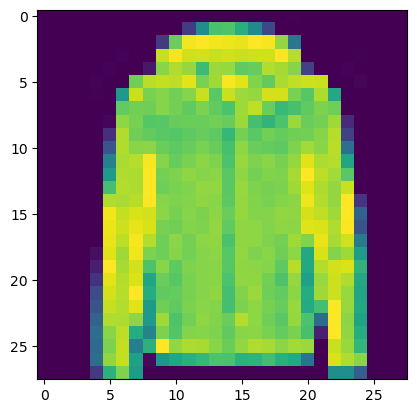

In [51]:
plt.figure()
plt.grid(False)
plt.imshow(x_tarin[0])
plt.show()

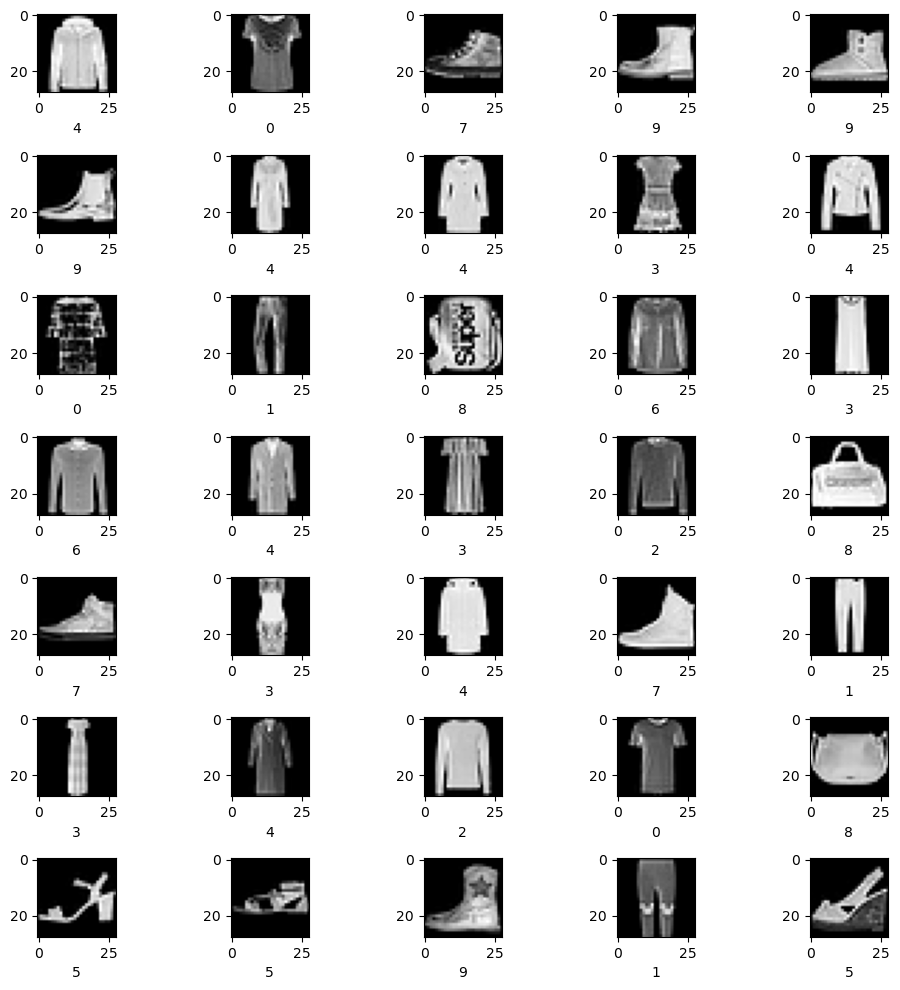

In [52]:
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.imshow(x_tarin[i],cmap='gray')
    plt.xlabel(y_train[i])
    plt.grid(False)
plt.tight_layout() 
plt.show()

In [53]:
class_names=["T-shirt","Pants","Hoodie","Dress","coat","Sandal","shirt","Sneakers","Bag","Boot"]

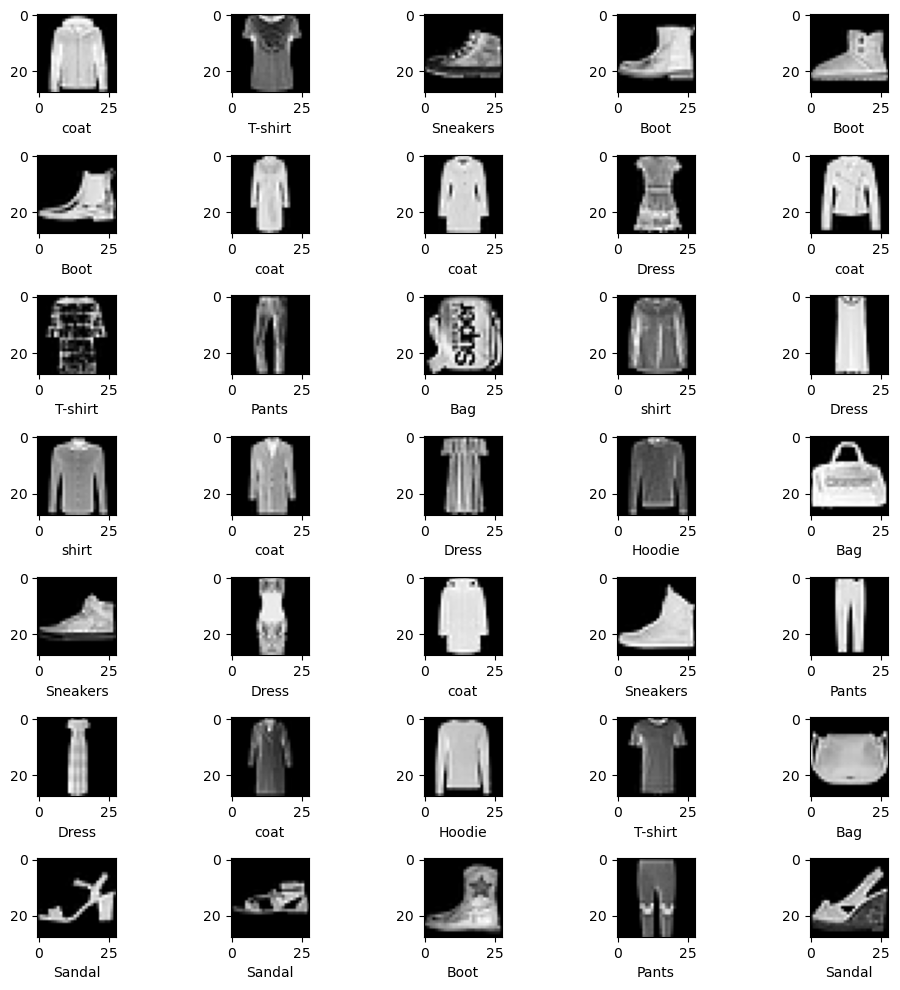

In [54]:
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.imshow(x_tarin[i],cmap='gray')
    plt.xlabel(class_names[y_train[i]])
    plt.grid(False)
plt.tight_layout() 
plt.show()

# model

In [55]:
model=Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    Dense(120,activation="relu"),
    Dense(64,activation="relu"),
    Dense(16,activation="relu"),
    Dense(10,activation="softmax")
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,154 (402.95 KB)

 Trainable params: 103,154 (402.95 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [72]:
# train
Ann_model=model.fit(x_tarin,y_train,batch_size=32,epochs=10,validation_data=(x_vaild,y_vaild))
loss_vaild,acc_vaild=model.evaluate(x_vaild,y_vaild,verbose=2)
print(f"\nacc_vaild: {acc_vaild}")

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9314 - loss: 0.1809 - val_accuracy: 0.8902 - val_loss: 0.3668
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9323 - loss: 0.1783 - val_accuracy: 0.8896 - val_loss: 0.3395
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9373 - loss: 0.1649 - val_accuracy: 0.8914 - val_loss: 0.3446
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9380 - loss: 0.1656 - val_accuracy: 0.8974 - val_loss: 0.3517
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9376 - loss: 0.1651 - val_accuracy: 0.8928 - val_loss: 0.3640
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9388 - loss: 0.1643 - val_accuracy: 0.8936 - val_loss: 0.3748
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9425 - loss: 0.1543 - val_accuracy: 0.8934 - val_loss: 0.3702
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9411 - loss: 0

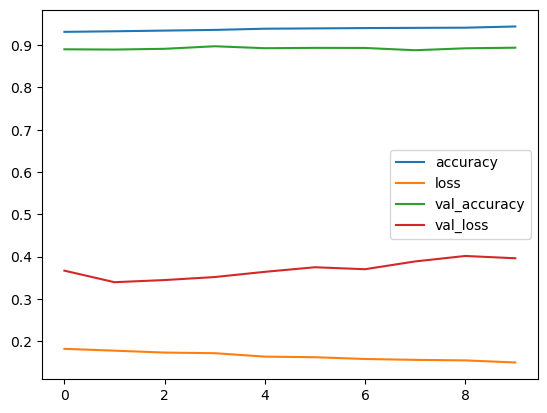

In [74]:
pd.DataFrame(Ann_model.history).plot()
plt.show()

In [80]:
model.evaluate(x_test_full,y_test_full)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8631 - loss: 77.7997


[78.09080505371094, 0.8628000020980835]

In [84]:
y_pred=model.predict(x_test_full[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


In [85]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
y_pred_final=np.argmax(y_pred,axis=1)

In [91]:
y_pred_final

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0],
      dtype=int64)

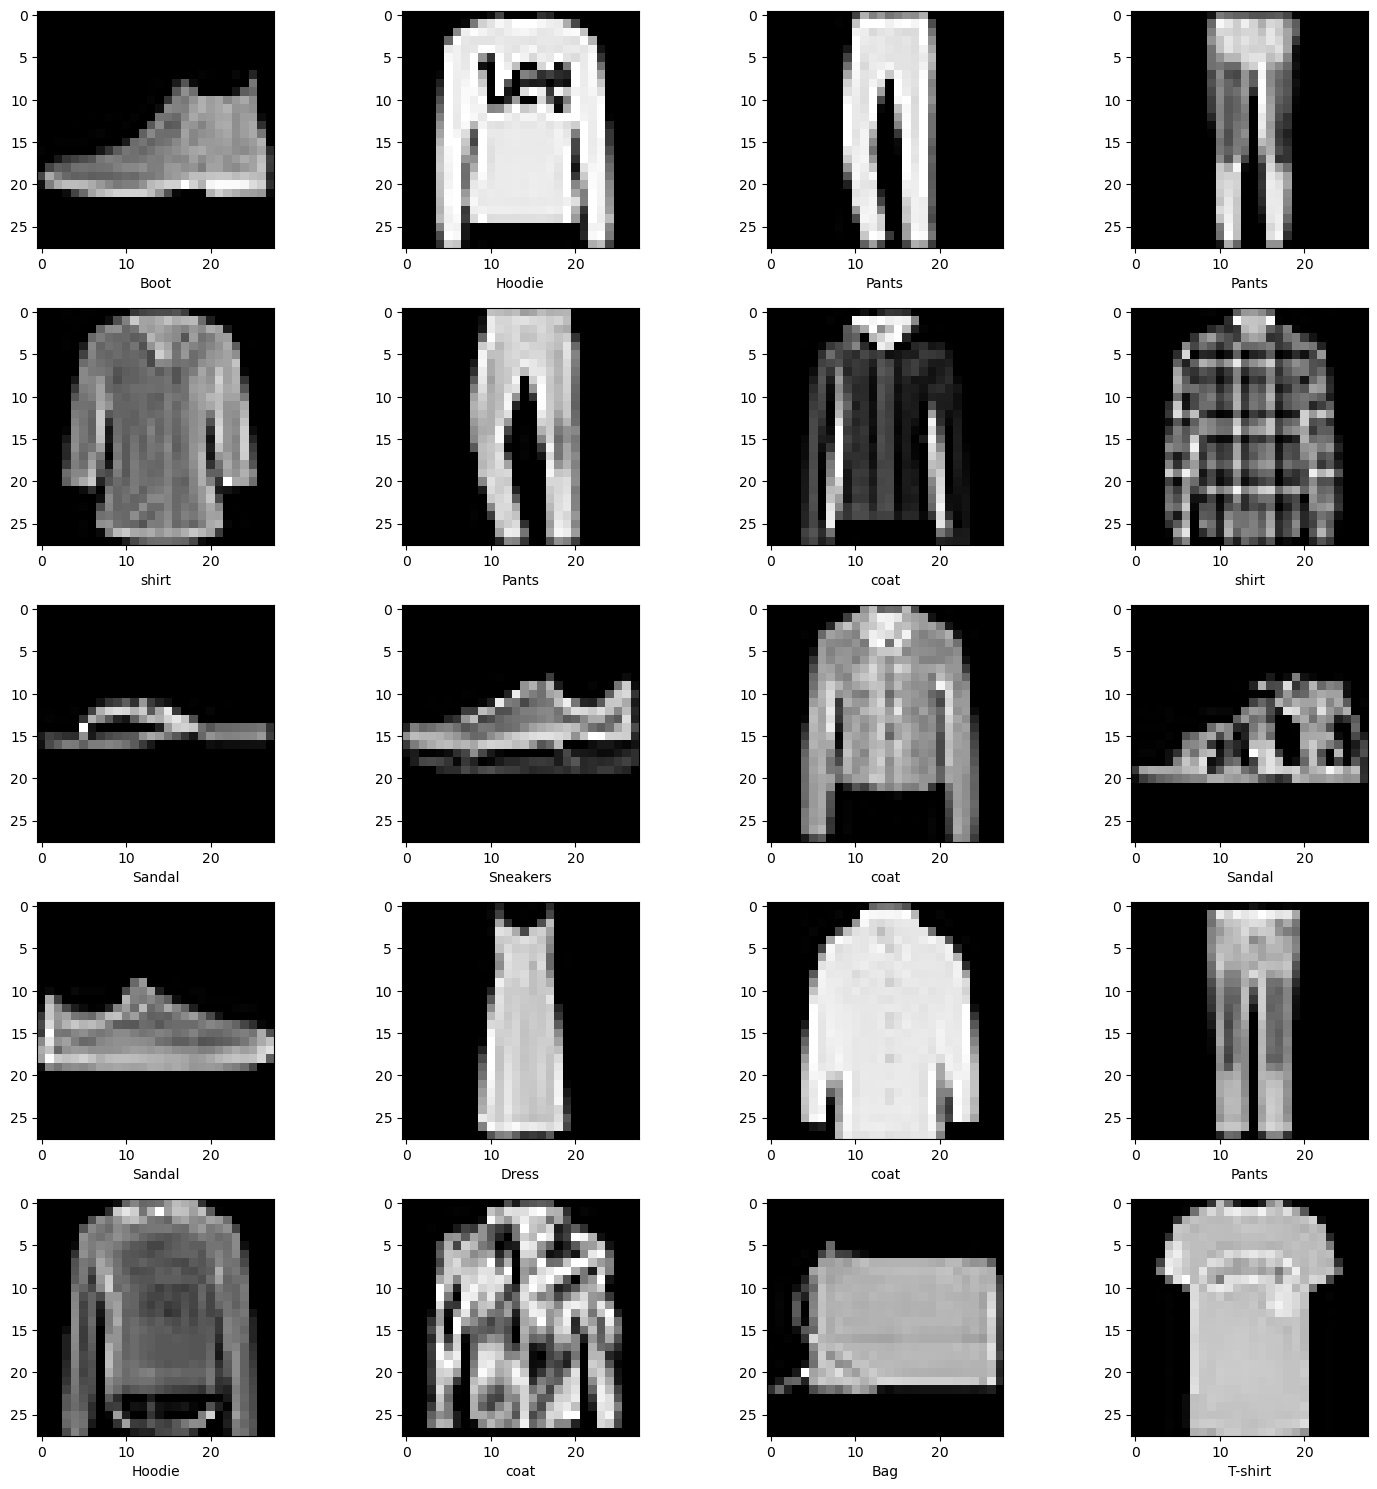

In [94]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test_full[i],cmap="gray")
    plt.xlabel(class_names[y_pred_final[i]])
    plt.grid(False)
plt.tight_layout()
plt.show()